https://data.cdc.gov/Nutrition-Physical-Activity-and-Obesity/Nutrition-Physical-Activity-and-Obesity-Behavioral/hn4x-zwk7/about_data

In [1]:
# Importing all relevant packages to the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings  # Import warnings to handle warning messages
warnings.filterwarnings('ignore')  # Ignore warning messages to avoid cluttering the output

%matplotlib inline

In [56]:
df = pd.read_csv('Datasets/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
pd.set_option('display.max_columns', None)

In [57]:
df.head(3)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,23.3,23.3,NaN,NaN,16.1,32.4,128.0,NaN,NaN,NaN,NaN,NaN,2 or more races,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,35.5,35.5,NaN,NaN,22.7,50.9,63.0,NaN,NaN,NaN,NaN,NaN,Other,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,21.7,21.7,NaN,NaN,19.1,24.6,1702.0,NaN,NaN,NaN,Female,NaN,NaN,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Gender,Female,GEN,FEMALE


In [4]:
df.shape

(104272, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104272 entries, 0 to 104271
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   104272 non-null  int64  
 1   YearEnd                     104272 non-null  int64  
 2   LocationAbbr                104272 non-null  object 
 3   LocationDesc                104272 non-null  object 
 4   Datasource                  104272 non-null  object 
 5   Class                       104272 non-null  object 
 6   Topic                       104272 non-null  object 
 7   Question                    104272 non-null  object 
 8   Data_Value_Unit             88872 non-null   float64
 9   Data_Value_Type             104272 non-null  object 
 10  Data_Value                  93505 non-null   float64
 11  Data_Value_Alt              93505 non-null   float64
 12  Data_Value_Footnote_Symbol  10767 non-null   object 
 13  Data_Value_Foo

In [6]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [7]:
df.YearStart.unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023], dtype=int64)

In [8]:
df.YearEnd.unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023], dtype=int64)

In [9]:
# df.LocationAbbr.unique()

In [10]:
df.LocationDesc.unique()

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'District of Columbia', 'Delaware',
       'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts',
       'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri',
       'Mississippi', 'Montana', 'North Carolina', 'North Dakota',
       'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada',
       'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'National', 'Utah', 'Virginia', 'Vermont', 'Washington',
       'Wisconsin', 'West Virginia', 'Wyoming', 'Puerto Rico', 'Guam',
       'Virgin Islands'], dtype=object)

In [11]:
# df.Datasource.unique()

# Since the Datasource is uniform "BRFSS", the column will be dropped

In [12]:
df.Class.unique()

array(['Obesity / Weight Status', 'Physical Activity',
       'Fruits and Vegetables'], dtype=object)

In [13]:
df.Topic.unique()

array(['Obesity / Weight Status', 'Physical Activity - Behavior',
       'Fruits and Vegetables - Behavior'], dtype=object)

In [14]:
df.Question.unique()

# I will shorten the question strings and check to see if there is a relationship between other columns

array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who engage in no leisure-time physical activity',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combinatio

In [15]:
df.Data_Value_Unit.unique()

array([2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.,
       2020., 2021.,   nan])

In [16]:
df.Data_Value_Type.unique()

array(['Value'], dtype=object)

In [17]:
df.Data_Value_Unit.unique()

array([2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.,
       2020., 2021.,   nan])

In [18]:
# df.Data_Value.unique()

In [19]:
# df.Data_Value_Alt.unique()

In [20]:
df.Data_Value_Footnote_Symbol.unique()

array([nan, '~'], dtype=object)

In [21]:
df.Data_Value_Footnote.unique()

array([nan, 'Data not available because sample size is insufficient.'],
      dtype=object)

In [22]:
df.Sample_Size.unique()

array([ 128.,   63., 1702., ..., 4124., 4472., 3763.])

In [23]:
#'Total', 'Age(years)', 'Education', 'Gender', 'Income', 'Race/Ethnicity' Data_Value_Footnote_Symbol and Data_Value_Footnote have shown to have very high missing value and will also be handled

In [24]:
df.QuestionID.unique()

array(['Q036', 'Q044', 'Q037', 'Q046', 'Q045', 'Q047', 'Q043', 'Q018',
       'Q019'], dtype=object)

In [25]:
df.LocationID.unique()

array([ 2,  1,  5,  4,  6,  8,  9, 11, 10, 12, 13, 15, 19, 16, 17, 18, 20,
       21, 22, 25, 24, 23, 26, 27, 29, 28, 30, 37, 38, 31, 33, 34, 35, 32,
       36, 39, 40, 41, 42, 44, 45, 46, 47, 48, 59, 49, 51, 50, 53, 55, 54,
       56, 72, 66, 78], dtype=int64)

In [26]:
df.StratificationCategory1.unique()

array(['Race/Ethnicity', 'Gender', 'Age (years)', 'Income', 'Education',
       'Total'], dtype=object)

In [27]:
df.StratificationCategoryId1.unique()

array(['RACE', 'GEN', 'AGEYR', 'INC', 'EDU', 'OVR'], dtype=object)

In [28]:
df.Stratification1.unique()

array(['2 or more races', 'Other', 'Female', '35 - 44',
       '$15,000 - $24,999', 'Male', 'Less than high school', '25 - 34',
       'Non-Hispanic White', 'Asian', 'Some college or technical school',
       '18 - 24', '$50,000 - $74,999', 'Hawaiian/Pacific Islander',
       'High school graduate', '$75,000 or greater',
       'American Indian/Alaska Native', 'College graduate', 'Hispanic',
       'Non-Hispanic Black', 'Less than $15,000', '55 - 64',
       '65 or older', 'Total', '$25,000 - $34,999', '45 - 54',
       'Data not reported', '$35,000 - $49,999'], dtype=object)

In [29]:
df.StratificationID1.unique()

array(['RACE2PLUS', 'RACEOTH', 'FEMALE', 'AGEYR3544', 'INC1525', 'MALE',
       'EDUHS', 'AGEYR2534', 'RACEWHT', 'RACEASN', 'EDUCOTEC',
       'AGEYR1824', 'INC5075', 'RACEHPI', 'EDUHSGRAD', 'INC75PLUS',
       'RACENAA', 'EDUCOGRAD', 'RACEHIS', 'RACEBLK', 'INCLESS15',
       'AGEYR5564', 'AGEYR65PLUS', 'OVERALL', 'INC2535', 'AGEYR4554',
       'INCNR', 'INC3550'], dtype=object)

### Dropping unnecessary columns

#### Columns to drop


YearEnd countains the same values as YearStart, it will be dropped and YearStart renamed to Year

GeoLocation will be dropped as we already h LocationDesc

LocationAbbr column will be dropped for now.

Topic columns will be dropped as it is same with the Class column

'Data_Value_Unit' will be dropped as it is same as Year column, also i will drop the 'Data_Value_Type' and DataValueTypeID column as it contains a single vlaue

Data_Value_Alt will be dropped as it is the same with Data_Value

TopcID will be dropped as it is similar with ClassID

In [30]:
# Dropping unnecessary columns

unnecessary_columns = ['YearEnd', 'GeoLocation', 'LocationAbbr', 'Datasource', 'Topic', 'Data_Value_Type', 'Data_Value_Unit', 'Data_Value_Alt', 'TopicID', 'DataValueTypeID']

df = df.drop(columns= unnecessary_columns)

In [31]:
df.shape

(104272, 23)

In [32]:
# Renaming YearStart to Year
df = df.rename(columns = {'YearStart' : 'Year'})

### Handling Missing Values

In [33]:
df.isna().sum().sum()

751438

In [34]:
df.isna().sum()

Year                               0
LocationDesc                       0
Class                              0
Question                           0
Data_Value                     10767
Data_Value_Footnote_Symbol     93505
Data_Value_Footnote            93505
Low_Confidence_Limit           10767
High_Confidence_Limit          10767
Sample_Size                    10767
Total                         100548
Age(years)                     81928
Education                      89376
Gender                         96824
Income                         78204
Race/Ethnicity                 74480
ClassID                            0
QuestionID                         0
LocationID                         0
StratificationCategory1            0
Stratification1                    0
StratificationCategoryId1          0
StratificationID1                  0
dtype: int64

In [35]:
# viewing the percentage of missing value
missing_percentage = df.isna().mean() * 100
print(missing_percentage.round(2).astype(str) + '%')

Year                            0.0%
LocationDesc                    0.0%
Class                           0.0%
Question                        0.0%
Data_Value                    10.33%
Data_Value_Footnote_Symbol    89.67%
Data_Value_Footnote           89.67%
Low_Confidence_Limit          10.33%
High_Confidence_Limit         10.33%
Sample_Size                   10.33%
Total                         96.43%
Age(years)                    78.57%
Education                     85.71%
Gender                        92.86%
Income                         75.0%
Race/Ethnicity                71.43%
ClassID                         0.0%
QuestionID                      0.0%
LocationID                      0.0%
StratificationCategory1         0.0%
Stratification1                 0.0%
StratificationCategoryId1       0.0%
StratificationID1               0.0%
dtype: object


In [36]:
# Print out columns with more than 70% missing values
missing_columns_to_drop = missing_percentage[missing_percentage > 70].index
print("Columns with more than 70% missing values:")
print(missing_columns_to_drop)

Columns with more than 70% missing values:
Index(['Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Total',
       'Age(years)', 'Education', 'Gender', 'Income', 'Race/Ethnicity'],
      dtype='object')


In [37]:
df = df.drop(columns=missing_columns_to_drop)

In [38]:
df.isna().sum()

Year                             0
LocationDesc                     0
Class                            0
Question                         0
Data_Value                   10767
Low_Confidence_Limit         10767
High_Confidence_Limit        10767
Sample_Size                  10767
ClassID                          0
QuestionID                       0
LocationID                       0
StratificationCategory1          0
Stratification1                  0
StratificationCategoryId1        0
StratificationID1                0
dtype: int64

In [39]:
# Fiiling the numerical missing values with median

df.fillna(df.median(), inplace=True)

In [40]:
df.isna().sum()

Year                         0
LocationDesc                 0
Class                        0
Question                     0
Data_Value                   0
Low_Confidence_Limit         0
High_Confidence_Limit        0
Sample_Size                  0
ClassID                      0
QuestionID                   0
LocationID                   0
StratificationCategory1      0
Stratification1              0
StratificationCategoryId1    0
StratificationID1            0
dtype: int64

In [41]:
df.duplicated().sum() # Checking for duplicates

0

In [42]:
df.shape

(104272, 15)

In [43]:
def identify_and_remove_outliers(df):
    # Create a copy of the dataframe
    df_no_outliers = df.copy()
    
    # Select numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Dictionary to store outlier counts
    outlier_counts = {}
    
    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
        
        # Remove outliers
        df_no_outliers = df_no_outliers[
            (df_no_outliers[column] >= lower_bound) & 
            (df_no_outliers[column] <= upper_bound)
        ]
    
    return df_no_outliers, outlier_counts, df

In [44]:
# Apply the function
df_cleaned, outliers_info, df = identify_and_remove_outliers(df)

# Print outlier information
for column, count in outliers_info.items():
    print(f"{column}: {count} outliers removed")

Year: 0 outliers removed
Data_Value: 4042 outliers removed
Low_Confidence_Limit: 3325 outliers removed
High_Confidence_Limit : 4288 outliers removed
Sample_Size: 10868 outliers removed
LocationID: 0 outliers removed


In [45]:
df.shape

(104272, 15)

In [46]:
df_cleaned.shape

(88493, 15)

In [47]:
outliers_info

{'Year': 0,
 'Data_Value': 4042,
 'Low_Confidence_Limit': 3325,
 'High_Confidence_Limit ': 4288,
 'Sample_Size': 10868,
 'LocationID': 0}

### Exploratory Data Analysis (EDA)

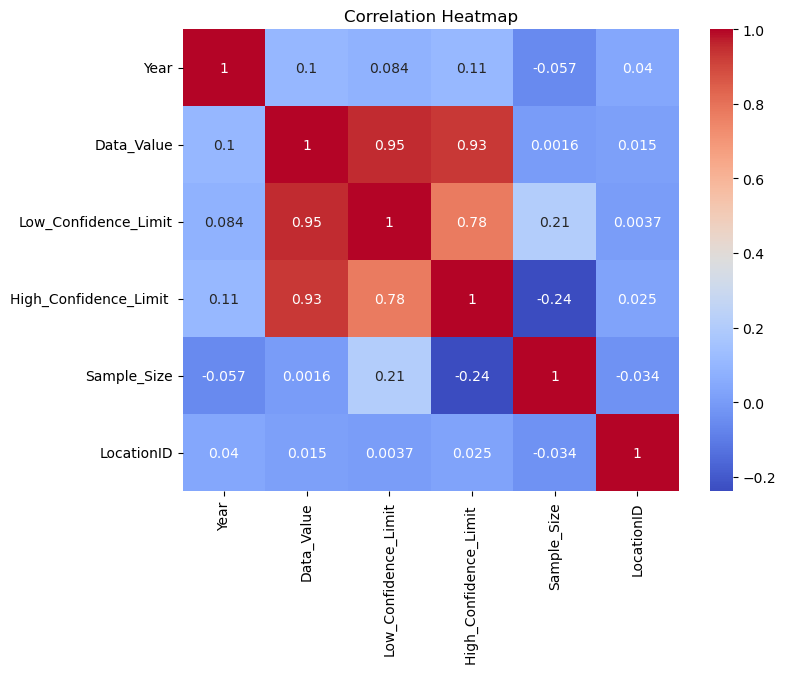

In [50]:
# Correlation Heatmap to see the summary relationship between the features
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(8, 6))
correlation_matrix = df_cleaned[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [49]:
df_cleaned.describe()

,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,88493.000000,88493.000000,88493.000000,88493.000000,88493.000000,88493.000000
mean,2017.023550,30.928268,26.328879,36.145799,1229.936153,30.579368
std,3.699672,8.172100,8.132068,8.910429,990.065807,17.475931
min,2011.000000,9.400000,4.400000,12.700000,50.000000,1.000000
25%,2014.000000,25.800000,20.900000,30.700000,518.000000,17.000000
50%,2017.000000,31.700000,27.300000,36.500000,1085.000000,30.000000
75%,2020.000000,36.000000,31.500000,41.400000,1613.000000,44.000000
max,2023.000000,53.200000,49.500000,59.400000,4562.000000,78.000000


In [51]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88493 entries, 0 to 104271
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       88493 non-null  int64  
 1   LocationDesc               88493 non-null  object 
 2   Class                      88493 non-null  object 
 3   Question                   88493 non-null  object 
 4   Data_Value                 88493 non-null  float64
 5   Low_Confidence_Limit       88493 non-null  float64
 6   High_Confidence_Limit      88493 non-null  float64
 7   Sample_Size                88493 non-null  float64
 8   ClassID                    88493 non-null  object 
 9   QuestionID                 88493 non-null  object 
 10  LocationID                 88493 non-null  int64  
 11  StratificationCategory1    88493 non-null  object 
 12  Stratification1            88493 non-null  object 
 13  StratificationCategoryId1  88493 non-null  ob

In [54]:
df_cleaned.head(3)

,Year,LocationDesc,Class,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,ClassID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,23.3,16.1,32.4,128.0,OWS,Q036,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.5,22.7,50.9,63.0,OWS,Q036,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,Alaska,Physical Activity,Percent of adults who achieve at least 150 min...,21.7,19.1,24.6,1702.0,PA,Q044,2,Gender,Female,GEN,FEMALE


In [ ]:
# df1.to_csv('df1.csv', index=False)